<a href="https://colab.research.google.com/github/sbbzplt/QWorld-Bronze/blob/master/quantum-with-qiskit/Q76_Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://github.com/sbbzplt/QWorld-Bronze/blob/master/qworld/images/header.jpg?raw=1"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Quantum Teleportation </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>
[<img src="https://github.com/sbbzplt/QWorld-Bronze/blob/master/qworld/images/watch_lecture.jpg?raw=1" align="left">](https://youtu.be/4PYeoqALKHk)
<br><br><br>

<hr>

_**Prepare a few blank sheets of paper**_
- _**to draw the circuit of the following protocol step by step and**_
- _**to solve some of tasks requiring certain calculations.**_

<hr>

Asja wants to send a qubit to Balvis by using only classical communication.

Let $ \ket{v} = \myvector{a\\b} \in \mathbb{R}^2 $ be the quantum state.

_Discussion:_ If Asja has many copies of this qubit, then she can collect the statistics based on these qubits and obtain an approximation of $ a $ and $ b $, say $ \tilde{a} $ and $\tilde{b}$, respectively. After this, Asja can send $ \tilde{a} $ and $\tilde{b}$ by using many classical bits, the number of which depends on the precision of the amplitudes.

On the other hand, If Asja and Balvis share the entangled qubits in state $ \sqrttwo\ket{00} + \sqrttwo\ket{11} $ in advance, then it is possible for Balvis to create $ \ket{v} $ in his qubit after receiving two bits of information from Asja.

<h3> Protocol </h3>

The protocol uses three qubits as specified below:

<img src='https://github.com/sbbzplt/QWorld-Bronze/blob/master/quantum-with-qiskit/images/quantum_teleportation_qubits.png?raw=1' width="25%" align="left">

Asja has two qubits and Balvis has one qubit.

Asja's quantum message (key) is $ \ket{v} = \myvector{a\\b} = a\ket{0} + b\ket{1} $.

The entanglement between Asja's second qubit and Balvis' qubit is  $ \sqrttwo\ket{00} + \sqrttwo\ket{11} $.

So, the quantum state of the three qubits is

$$ \mypar{a\ket{0} + b\ket{1}}\mypar{\sqrttwo\ket{00} + \sqrttwo\ket{11}}
    = \sqrttwo \big( a\ket{000} + a \ket{011} + b\ket{100} + b \ket{111} \big).  $$

<h4> CNOT operator by Asja </h4>

Asja applies CNOT gate to her qubits where $q[2]$ is the control qubit and $q[1]$ is the target qubit.

<h3>Task 1</h3>

Calculate the new quantum state after this CNOT operator.

<a href="Q76_Quantum_Teleportation_Solutions.ipynb#task1">click for our solution</a>

<h3>Hadamard operator by Asja</h3>

Asja applies Hadamard gate to $q[2]$.

<h3>Task 2</h3>

Calculate the new quantum state after this Hadamard operator.

Verify that the resulting quantum state can be written as follows:

$$  
    \frac{1}{2} \ket{00} \big( a\ket{0}+b\ket{1} \big) +
    \frac{1}{2} \ket{01} \big( a\ket{1}+b\ket{0} \big) +
    \frac{1}{2} \ket{10} \big( a\ket{0}-b\ket{1} \big) +
    \frac{1}{2} \ket{11} \big( a\ket{1}-b\ket{0} \big) .
$$

<a href="Q76_Quantum_Teleportation_Solutions.ipynb#task2">click for our solution</a>

<h3> Measurement by Asja </h3>

Asja measures her qubits. With probability $ \frac{1}{4} $, she can observe one of the basis states.

Depeding on the measurement outcomes, Balvis' qubit is in the following states:
<ol>
    <li> "00": $ \ket{v_{00}} = a\ket{0} + b \ket{1} $ </li>
    <li> "01": $ \ket{v_{01}} =  a\ket{1} + b \ket{0} $ </li>
    <li> "10": $ \ket{v_{10}} =  a\ket{0} - b \ket{1} $ </li>
    <li> "11": $ \ket{v_{11}} =  a\ket{1} - b \ket{0} $ </li>
</ol>

As can be observed, the amplitudes $ a $ and $ b $ are "transferred" to Balvis' qubit in each case.

If Asja sends the measurement outcomes, then Balvis can construct $ \ket{v} $ exactly.

<h3>Task 3</h3>

Asja sends the measurement outcomes to Balvis by using two classical bits: $ x $ and $ y $.

For each $ (x,y) $ pair, determine the quantum operator(s) that Balvis can apply to obtain $ \ket{v} = a\ket{0}+b\ket{1} $ exactly.

<a href="Q76_Quantum_Teleportation_Solutions.ipynb#task3">click for our solution</a>

<h3> Task 4 </h3>

Create a quantum circuit with three qubits as described at the beginning of this notebook and two classical bits.

Implement the protocol given above until Asja makes the measurements (included).
- The state of $q[2]$ can be set by the rotation with a randomly picked angle.
- Remark that Balvis does not make the measurement.

At this point, read the state vector of the circuit by using "statevector_simulator".

_When a circuit having measurement is simulated by "statevector_simulator", the simulator picks one of the outcomes, and so we see one of the states after the measurement._

Verify that the state of Balvis' qubit is in one of these: $ \ket{v_{00}}$, $ \ket{v_{01}}$, $ \ket{v_{10}}$, and $ \ket{v_{11}}$.

Guess the measurement outcome obtained by "statevector_simulator".

In [ ]:
#
# your code is here
#


<a href="Q76_Quantum_Teleportation_Solutions.ipynb#task4">click for our solution</a>

<h3> Task 5 </h3>

Implement the protocol above by including the post-processing part done by Balvis, i.e., the measurement results by Asja are sent to Balvis and then he may apply $ X $ or $ Z $ gates depending on the measurement results.

We use the classically controlled quantum operators.

Since we do not make measurement on $ q[0] $, we define only 2 classical bits, each of which can also be defined separated.

    q = QuantumRegister(3)
    c2 = ClassicalRegister(1,'c2')
    c1 = ClassicalRegister(1,'c1')
    qc = QuantumCircuit(q,c1,c2)
    ...
    qc.measure(q[1],c1)
    ...
    qc.x(q[0]).c_if(c1,1) # x-gate is applied to q[0] if the classical bit c1 is equal to 1

Read the state vector and verify that Balvis' state is $ \myvector{a \\ b} $ after the post-processing.

In [ ]:
#
# your code is here
#


<a href="Q76_Quantum_Teleportation_Solutions.ipynb#task5">click for our solution</a>

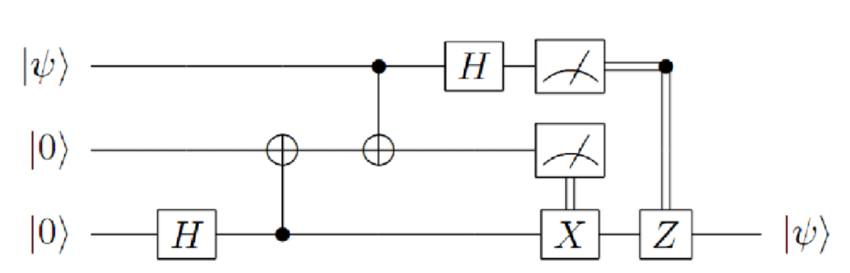

<!--
<h3> Task 6 (optional) </h3>

Observe that Balvis can also t

Create a quantum circuit with four qubits and four classical bits.

Assume that Asja has the first two qubits (number 3 and 2) and Balvis has the last two qubits (number 1 and 0).

Create an entanglement between qubits 2 and 1.

Implement the protocol (the state of the qubit can be set by a rotation with randomly picked angle):
- If Asja teleports a qubit, then set the state of qubit 3.
- If Balvis teleports a qubit, then set the state of qubit 0.
-->